### Inspect Training Data

In [1]:
import sys
sys.path.append('..')

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from torch.utils.data import DataLoader
from src.datasets.animal_dataset import AnimalDataset
from src.config import DATA_FOLDER

In [2]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image  

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)
        
        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[np.argmax(labels[i])]
        ax.set_title(label)
        ax.axis('off')

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


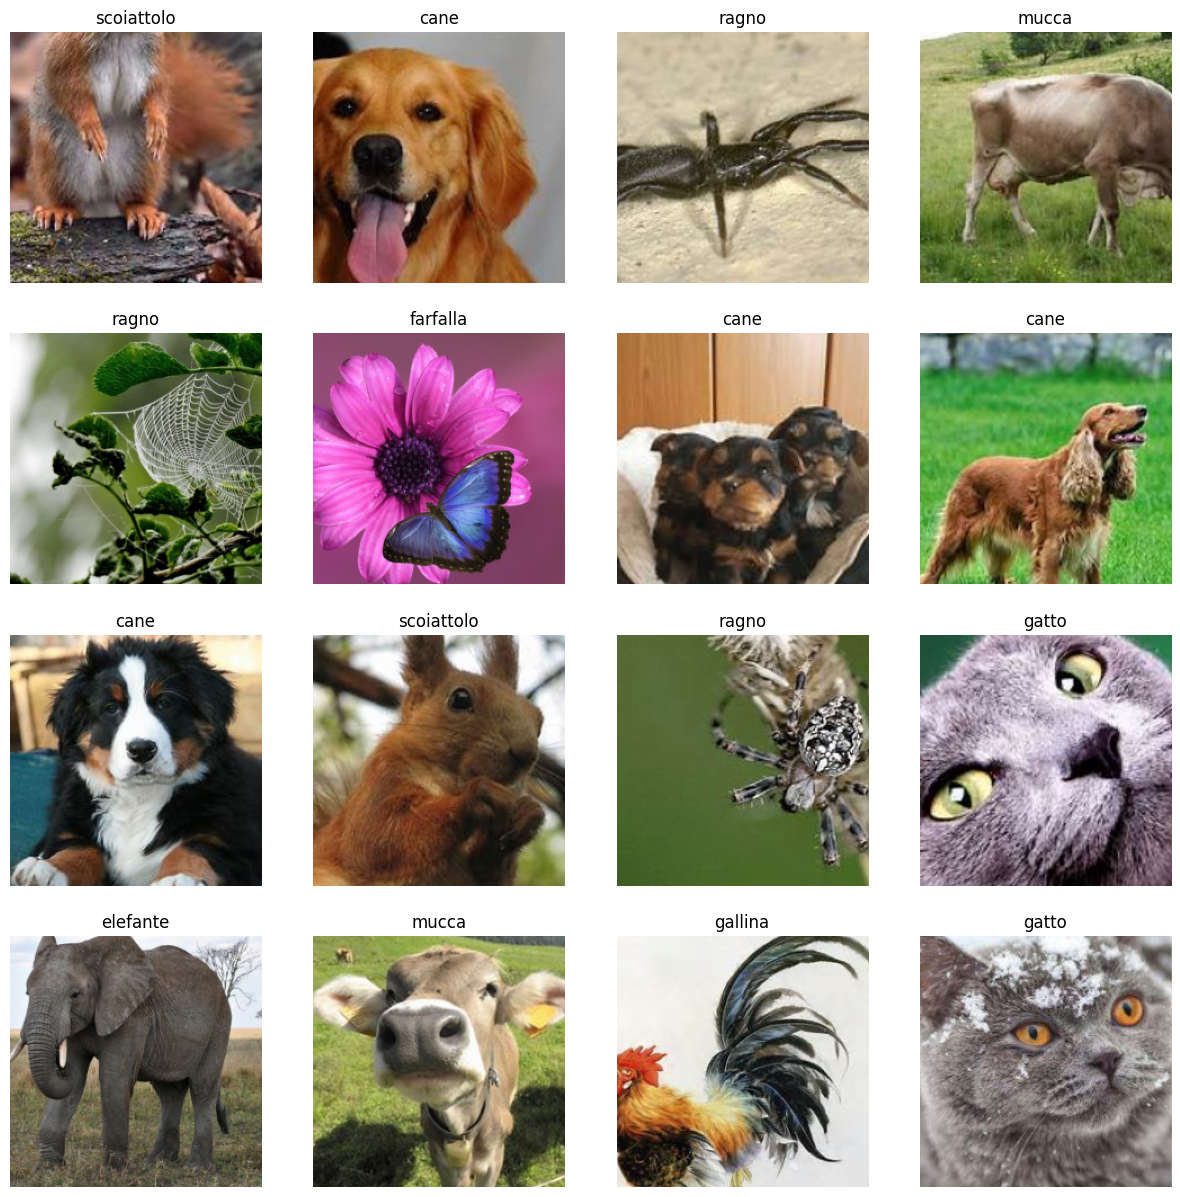

In [3]:
data_path = Path("..") / DATA_FOLDER
train_annotations_path = data_path / 'train.csv'
train_images_folder = data_path / 'images/'

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

train_set = AnimalDataset(train_annotations_path, train_images_folder, transform, target_transform)
train_loader = DataLoader(train_set, batch_size=16, shuffle=True, drop_last=True)

dataiter = iter(train_loader)
images, labels = next(dataiter)

classes = ['cane','cavallo','elefante','farfalla','gallina','gatto','mucca','pecora','ragno','scoiattolo']
plot_images(images, labels, classes)